Accuracy: 0.9149065307113377
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



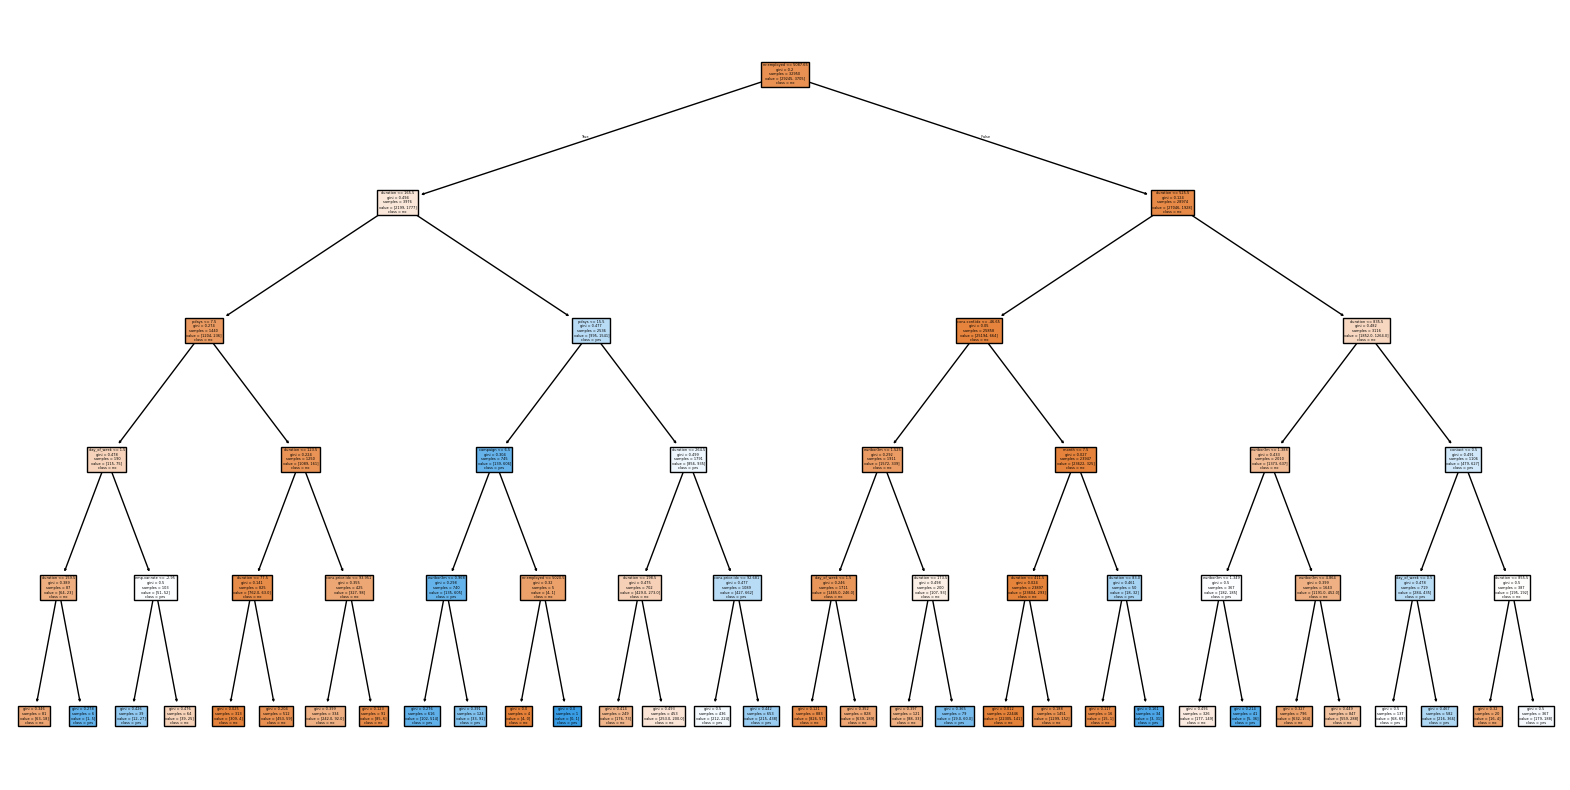

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv("bank-additional-full.csv", sep=';')  # adjust path as needed

#Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

#Split data into features and target
X = df.drop('y', axis=1)
y = df['y']  # target: 1 = yes, 0 = no (already encoded)

#Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

#Evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["no", "yes"], filled=True)
plt.show()
